# 4.1.3 Polynomial Regression

## Explanation of Polynomial Regression

**Polynomial Regression** is a form of regression analysis in which the relationship between the independent variable \( X \) and the dependent variable \( Y \) is modeled as an \( n \)-th degree polynomial. The general form of a polynomial regression model is:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \beta_n X^n + \epsilon $$

### Where:
- \( Y \): Dependent variable
- \( X \): Independent variable
- $( \beta_0, \beta_1, \beta_2, \ldots, \beta_n )$: Coefficients
- $( \epsilon )$: Error term

### **Scenarios Where Polynomial Regression is Applicable**:
- **Non-linear Relationships**: When the relationship between the independent and dependent variables is non-linear, polynomial regression can capture the curvature.
- **Higher Flexibility**: Polynomial regression provides a more flexible approach compared to linear regression by fitting a polynomial curve to the data.
- **Complex Data Patterns**: It is useful for modeling more complex patterns in data that cannot be captured by linear models.

## Vandermonde Matrix

To implement polynomial regression, we often use a special matrix called the **Vandermonde matrix**. For a given set of input data \( X \), the Vandermonde matrix \( V \) is defined as follows:

$$ V = 
\begin{bmatrix}
1 & X_1 & X_1^2 & \cdots & X_1^n \\
1 & X_2 & X_2^2 & \cdots & X_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_m & X_m^2 & \cdots & X_m^n
\end{bmatrix}
$$

Each row of the Vandermonde matrix corresponds to the powers of a single data point, and each column corresponds to the same power for all data points. The Vandermonde matrix allows us to transform our input data \( X \) into a format that can be used to fit a polynomial model.

### Use of Vandermonde Matrix in Polynomial Regression

In polynomial regression, we use the Vandermonde matrix to represent the polynomial features of the input data. By doing so, we can rewrite the polynomial regression model in matrix form:

$$ \mathbf{Y} = V \boldsymbol{\beta} + \boldsymbol{\epsilon} $$

Where:
- \( \mathbf{Y} \) is the vector of observed values of the dependent variable.
- \( V \) is the Vandermonde matrix of the input data.
- $( \boldsymbol{\beta} )$ is the vector of coefficients to be estimated.
- $( \boldsymbol{\epsilon} )$ is the vector of error terms.

This matrix form is similar to that of linear regression, allowing us to use linear algebra techniques to solve for the coefficients $( \boldsymbol{\beta} )$.

In the following sections, we will demonstrate how to implement Polynomial Regression both from scratch and using `sklearn`.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Generating some random data for demonstration
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)


In [3]:
print(X[:5])

[[1.09762701]
 [1.43037873]
 [1.20552675]
 [1.08976637]
 [0.8473096 ]]


<hr>

## Implementing Polynomial Regression from Scratch


In [4]:
# Implementing Polynomial Regression from scratch
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
    
    def fit(self, X, Y):
        X_poly = self._polynomial_features(X)
        self.beta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ Y
    
    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.beta
    
    def _polynomial_features(self, X):
        X_poly = np.ones((X.shape[0], 1))
        for d in range(1, self.degree + 1):
            X_poly = np.hstack((X_poly, X**d))
        return X_poly

# Training the model from scratch
degree = 2
model_scratch = PolynomialRegression(degree)
model_scratch.fit(X, Y)

# Predicting from scratch
Y_pred_scratch = model_scratch.predict(X)

# Evaluating the model from scratch
mse_scratch = mean_squared_error(Y, Y_pred_scratch)
r2_scratch = r2_score(Y, Y_pred_scratch)

print(f"Mean Squared Error (scratch): {mse_scratch}")
print(f"R-squared (scratch): {r2_scratch}")


Mean Squared Error (scratch): 0.9735576723414217
R-squared (scratch): 0.9417201568500574


<hr>

## Implementing Polynomial Regression using `sklearn`


In [5]:
# Creating polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Creating a Linear Regression model using sklearn
model_sklearn = LinearRegression()

# Fitting the model using sklearn
model_sklearn.fit(X_poly, Y)

# Predicting using sklearn
Y_pred_sklearn = model_sklearn.predict(X_poly)

# Evaluating the model using sklearn
mse_sklearn = mean_squared_error(Y, Y_pred_sklearn)
r2_sklearn = r2_score(Y, Y_pred_sklearn)

print(f"Mean Squared Error (sklearn): {mse_sklearn}")
print(f"R-squared (sklearn): {r2_sklearn}")


Mean Squared Error (sklearn): 0.9735576723414219
R-squared (sklearn): 0.9417201568500574


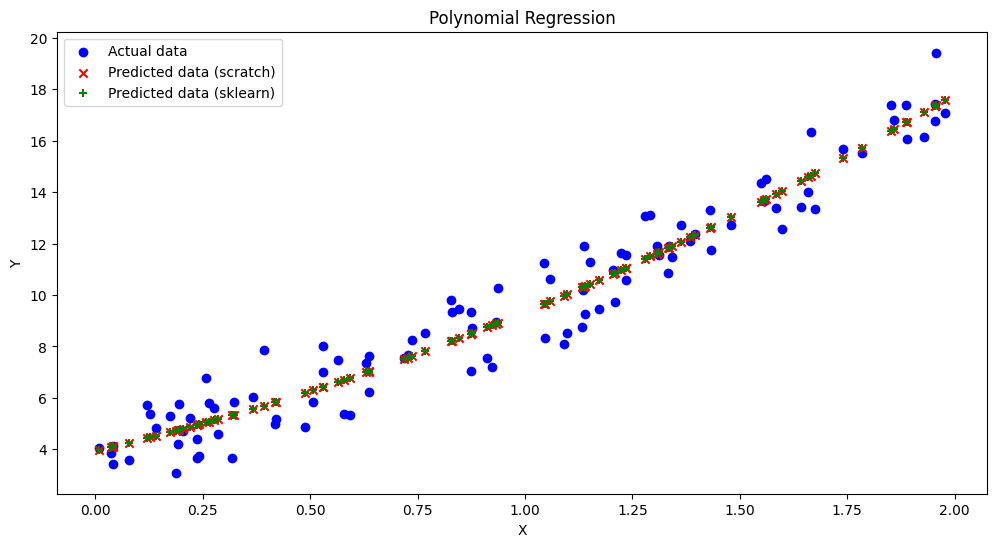

In [6]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting X vs Y
plt.scatter(X, Y, color='blue', label='Actual data')
plt.scatter(X, Y_pred_scratch, color='red', label='Predicted data (scratch)', marker='x')
plt.scatter(X, Y_pred_sklearn, color='green', label='Predicted data (sklearn)', marker='+')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


## Conclusion

In this example, we explored Polynomial Regression using both a custom implementation and the `sklearn` library. Here are the key takeaways:

- **Model Understanding**: Polynomial Regression models the relationship between an independent variable \( X \) and a dependent variable \( Y \) as a polynomial equation.
- **Implementation**: We implemented Polynomial Regression from scratch and also used the `PolynomialFeatures` and `LinearRegression` classes from `sklearn`.
- **Results**: Both implementations provided similar results, demonstrating how to fit the model to data, make predictions, and evaluate the model's performance.
- **Benefits**: Polynomial Regression can capture non-linear relationships and more complex data patterns that linear models cannot.

Polynomial Regression is a powerful tool in statistical analysis and predictive modeling, extending the capabilities of linear regression to handle non-linear relationships.
